In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [3]:
from nptdms import TdmsFile

# tdms_file = TdmsFile.read("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/2022_4_24_141554.tdms")
tdms_file = TdmsFile.read("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/2022_4_24_115854.tdms")
for group in tdms_file.groups():
    group_name = group.name
    for channel in group.channels():
        channel_name = channel.name
        # Access dictionary of properties:
        properties = channel.properties

        # Access numpy array of data for channel:
        data = channel[:]
        # Access a subset of data
        data_subset = channel[100:200]
        print(group_name, channel_name,data_subset)

DGTZ ch0 [119.921875  119.921875  119.921875  119.921875  119.921875  120.8984375
 119.921875  119.921875  119.921875  119.921875  119.921875  119.921875
 120.8984375 119.921875  119.921875  119.921875  119.921875  119.921875
 120.8984375 119.921875  120.8984375 119.921875  120.8984375 119.921875
 119.921875  119.921875  119.921875  119.921875  119.921875  119.921875
 119.921875  120.8984375 119.921875  120.8984375 119.921875  119.921875
 119.921875  119.921875  120.8984375 120.8984375 119.921875  118.9453125
 120.8984375 119.921875  119.921875  119.921875  119.921875  120.8984375
 118.9453125 119.921875  119.921875  119.921875  120.8984375 119.921875
 119.921875  120.8984375 119.921875  119.921875  119.921875  119.921875
 120.8984375 119.921875  120.8984375 119.921875  120.8984375 119.921875
 120.8984375 118.9453125 120.8984375 119.921875  119.921875  119.921875
 119.921875  120.8984375 119.921875  119.921875  119.921875  119.921875
 119.921875  119.921875  119.921875  119.921875  119

Text(0.5, 1.0, 'Without Source')

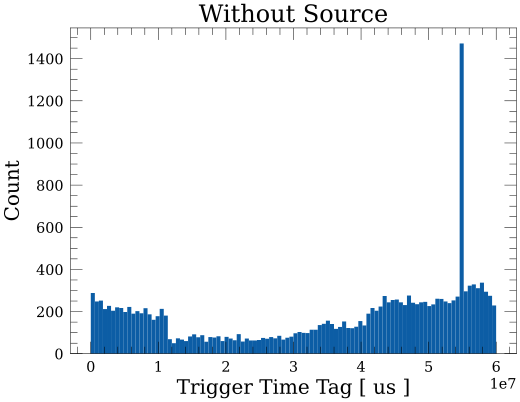

In [16]:
from collections import Counter
import datetime
v_timestamp = []
for triggerTime in tdms_file["OTHER"]["time"]:
    dateTime_object = np.datetime64(triggerTime).astype(datetime.datetime)
    v_timestamp.append(  dateTime_object.second*1e6+dateTime_object.microsecond  )
v_timestamp = np.array(v_timestamp)
plt.hist(v_timestamp, bins=100)
plt.xlabel("Trigger Time Tag [ us ]")
plt.ylabel("Count")
plt.title("Without Source")

In [15]:
print( len( v_timestamp[(1.2e7<v_timestamp)& (1.4e7>v_timestamp)])/(0.2e7/1e6) )
print(len( v_timestamp[(4.5e7<v_timestamp)& (5.4e7>v_timestamp)]))
len( v_timestamp[(4.5e7<v_timestamp)& (5.4e7>v_timestamp)])/(0.9e7/1e6)

108.0
3698


410.8888888888889

In [6]:
# sed = np.fromfile('/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/wave0.dat',dtype=)
datContent = [i.strip().split() for i in open("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/wave0.dat", mode="rb").readlines()]

In [7]:
with open("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/wave0.dat", mode="rb") as f:
    file = f.read(2)
file

b'"\x08'

1029


2082

31

327680

0

12

396029503

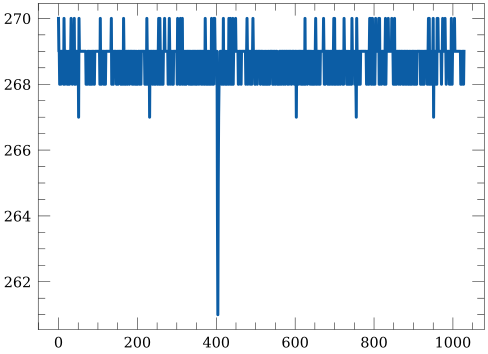

In [8]:
dtype = np.dtype('B')
with open("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/wave0.dat", "rb") as f:
    i0, i1, i2, i3, i4, i5 = np.fromfile(f, dtype='I', count=6)
    eventSize = (i0 - 24) // 2
    print(eventSize)
    dt = np.dtype('<H')
    trace = np.fromfile(f, dtype=dt, count=eventSize)
    # df = pd.DataFrame(numpy_data)
    display(i0, i1, i2, i3, i4, i5)
    plt.plot(trace)

,boardID,filePath,channel,pattern,eventCounter,triggerTimeTag,triggerTime,waveform
0,31,24,0,327680,12,396029503,3.168236e+06,"[270, 269, 269, 268, 269, 269, 268, 269, 269, ..."
1,31,2106,0,393216,13,420975087,3.367801e+06,"[269, 269, 268, 269, 269, 268, 270, 269, 269, ..."
2,31,4188,0,262144,14,428544091,3.428353e+06,"[269, 268, 269, 269, 268, 269, 269, 268, 268, ..."
3,31,6270,0,262144,15,458677523,3.669420e+06,"[269, 269, 268, 269, 268, 269, 269, 269, 269, ..."
4,31,8352,0,131072,16,505328479,4.042628e+06,"[268, 269, 268, 269, 268, 268, 268, 269, 270, ..."
5,31,10434,0,196608,17,516797691,4.134382e+06,"[269, 269, 269, 269, 269, 269, 270, 270, 269, ..."
6,31,12516,0,0,18,542956561,4.343652e+06,"[269, 269, 269, 269, 269, 268, 268, 269, 269, ..."
7,31,14598,0,262144,19,557376487,4.459012e+06,"[268, 269, 269, 270, 269, 269, 269, 269, 269, ..."
8,31,16680,0,131072,20,598018377,4.784147e+06,"[269, 269, 269, 269, 269, 269, 269, 270, 268, ..."
9,31,18762,0,196608,21,621566047,4.972528e+06,"[268, 269, 269, 269, 268, 269, 269, 270, 269, ..."


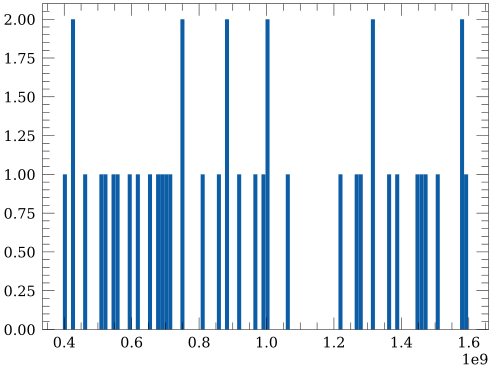

In [9]:
from importlib import reload
import DataReader
reload(DataReader)
from DataReader import WaveDumpReader
df_data = WaveDumpReader("/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/wave0.dat")
plt.hist( df_data["triggerTimeTag"] ,bins=100)
df_data

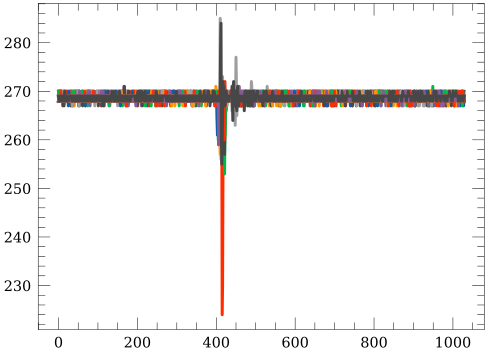

In [10]:
for wave in df_data["waveform"]:
    plt.plot(wave)